## Imports

In [1]:
%env TF_FORCE_UNIFIED_MEMORY=1

env: TF_FORCE_UNIFIED_MEMORY=1


In [2]:
import unlimtd_f
import time
from jax import random
import test
import plots
import ntk
import nll
from jax import numpy as np
import pickle
import models
import utils
import dataset_sines_infinite
import dataset_sines_finite

## Option #1: training the network in this notebook

In [3]:
dataset_sines_finite.init_dataset(random.PRNGKey(0), 0.05, _n_train_tasks=10)

2022-08-26 19:02:59.392851: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/pkgs/cudatoolkit-11.3.1-h2bc3f7f_2/lib
2022-08-26 19:02:59.392880: W external/org_tensorflow/tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
seed = 1655235988902897757
print(seed)

1655235988902897757


In [5]:
init_params, pre_state, pre_evals, post_state, pre_losses, post_losses, post_evals = unlimtd_f.unlimtd_f_uni_modal_finite(seed=seed,
                                                                                     pre_n_epochs=30000,
                                                                                     pre_n_tasks=6,
                                                                                     pre_K=10,
                                                                                     post_n_epochs=30000,
                                                                                     post_n_tasks=6,
                                                                                     post_K=10,
                                                                                     data_noise=0.05, 
                                                                                     maddox_noise=0.05,
                                                                                     meta_lr=0.001,
                                                                                     subspace_dimension=10)

This is UNLIMTD-F
For the uni-modal dataset: finite sine dataset (make sure that you have initialized dataset_sines_finite.py beforehand)
This variant of UNLIMTD-F approaches the distribution with a single GP
Creating model
Creating optimizers
Starting first part of training (identity covariance)
Starting training with:
-n_epochs=30000
-n_tasks=6
-K=10
-data_noise=0.05
-maddox_noise=0.05
0  | 1236.2206 (2.7959 s)
Eval: (DeviceArray(1721.0223, dtype=float32), DeviceArray(4.955229, dtype=float32))
10  | 979.8513 (0.0033 s)
20  | 183.6270 (0.0033 s)
30  | 1554.7561 (0.0033 s)
40  | 993.6662 (0.0033 s)
50  | 755.7170 (0.0033 s)
60  | 328.1130 (0.0033 s)
70  | 172.8349 (0.0033 s)
80  | 187.6762 (0.0033 s)
90  | 37.4248 (0.0033 s)
100  | 51.5513 (0.0033 s)
110  | 97.0201 (0.0033 s)
120  | 35.5976 (0.0033 s)
130  | 118.4670 (0.0033 s)
140  | 82.2834 (0.0033 s)
150  | 90.7843 (0.0033 s)
160  | 103.7850 (0.0033 s)
170  | 38.3985 (0.0033 s)
180  | 41.9580 (0.0033 s)
190  | 24.6333 (0.0033 s)
200

2770  | 9.1039 (0.0042 s)
2780  | 8.4920 (0.0047 s)
2790  | 6.9621 (0.0042 s)
2800  | 20.5479 (0.0054 s)
2810  | 15.0408 (0.0044 s)
2820  | 5.9598 (0.0041 s)
2830  | 5.2148 (0.0047 s)
2840  | 7.6266 (0.0036 s)
2850  | 8.9937 (0.0040 s)
2860  | 3.9715 (0.0045 s)
2870  | 8.8460 (0.0044 s)
2880  | 8.8998 (0.0046 s)
2890  | 9.8998 (0.0041 s)
2900  | 9.0673 (0.0043 s)
2910  | 6.4501 (0.0045 s)
2920  | 10.0978 (0.0050 s)
2930  | 7.2803 (0.0043 s)
2940  | 11.2767 (0.0050 s)
2950  | 2.8353 (0.0040 s)
2960  | 8.4173 (0.0046 s)
2970  | 5.5994 (0.0036 s)
2980  | 6.9047 (0.0044 s)
2990  | 3.9789 (0.0046 s)
3000  | 3.9369 (0.0042 s)
Eval: (DeviceArray(8.512227, dtype=float32), DeviceArray(0.25021702, dtype=float32))
3010  | 5.4758 (0.0039 s)
3020  | 7.5894 (0.0035 s)
3030  | 7.7844 (0.0039 s)
3040  | 7.3622 (0.0044 s)
3050  | 5.7812 (0.0039 s)
3060  | 8.2570 (0.0044 s)
3070  | 5.6962 (0.0039 s)
3080  | 9.3576 (0.0034 s)
3090  | 7.6374 (0.0037 s)
3100  | 6.1458 (0.0039 s)
3110  | 8.9832 (0.0034 s)
3

5750  | 7.7462 (0.0052 s)
5760  | 4.7325 (0.0049 s)
5770  | 3.5198 (0.0042 s)
5780  | 6.9206 (0.0046 s)
5790  | 5.9897 (0.0041 s)
5800  | 5.1247 (0.0045 s)
5810  | 2.9580 (0.0038 s)
5820  | 6.7855 (0.0046 s)
5830  | 1.2348 (0.0066 s)
5840  | 4.8646 (0.0065 s)
5850  | 6.0915 (0.0069 s)
5860  | 7.6666 (0.0050 s)
5870  | 1.5178 (0.0049 s)
5880  | 2.4777 (0.0039 s)
5890  | 6.1283 (0.0040 s)
5900  | 6.5790 (0.0054 s)
5910  | 6.9120 (0.0049 s)
5920  | 4.8504 (0.0039 s)
5930  | 5.1024 (0.0040 s)
5940  | 4.3642 (0.0044 s)
5950  | 7.3468 (0.0043 s)
5960  | 4.4483 (0.0045 s)
5970  | 5.0305 (0.0041 s)
5980  | 5.5685 (0.0044 s)
5990  | 4.3131 (0.0045 s)
6000  | 5.7524 (0.0047 s)
Eval: (DeviceArray(6.626486, dtype=float32), DeviceArray(0.10274313, dtype=float32))
6010  | 5.0698 (0.0038 s)
6020  | 7.0952 (0.0034 s)
6030  | 6.0706 (0.0036 s)
6040  | 4.8618 (0.0042 s)
6050  | 4.5849 (0.0038 s)
6060  | 3.4736 (0.0040 s)
6070  | 4.3975 (0.0035 s)
6080  | 8.5203 (0.0038 s)
6090  | 9.0573 (0.0039 s)
6100 

8740  | 4.8289 (0.0035 s)
8750  | 6.0464 (0.0042 s)
8760  | 3.5631 (0.0035 s)
8770  | 3.3958 (0.0034 s)
8780  | 2.9323 (0.0034 s)
8790  | 3.8042 (0.0042 s)
8800  | 7.4105 (0.0034 s)
8810  | 3.7482 (0.0035 s)
8820  | 4.3716 (0.0035 s)
8830  | 4.5692 (0.0040 s)
8840  | 4.1192 (0.0035 s)
8850  | 5.6443 (0.0034 s)
8860  | 4.0888 (0.0034 s)
8870  | 4.8681 (0.0040 s)
8880  | 6.8556 (0.0036 s)
8890  | 5.3949 (0.0034 s)
8900  | 5.7782 (0.0034 s)
8910  | 8.0191 (0.0039 s)
8920  | 5.6339 (0.0036 s)
8930  | 4.1680 (0.0034 s)
8940  | 7.3956 (0.0043 s)
8950  | 5.6667 (0.0034 s)
8960  | 4.2083 (0.0034 s)
8970  | 4.6166 (0.0034 s)
8980  | 4.6443 (0.0037 s)
8990  | 6.1542 (0.0036 s)
9000  | 3.3239 (0.0040 s)
Eval: (DeviceArray(6.165709, dtype=float32), DeviceArray(0.08927176, dtype=float32))
9010  | 2.7090 (0.0040 s)
9020  | 5.8287 (0.0034 s)
9030  | 6.9870 (0.0038 s)
9040  | 4.2669 (0.0049 s)
9050  | 5.3954 (0.0052 s)
9060  | 6.9181 (0.0047 s)
9070  | 5.8378 (0.0046 s)
9080  | 7.3272 (0.0039 s)
9090 

11680  | 8.4287 (0.0037 s)
11690  | 2.6507 (0.0040 s)
11700  | 3.7302 (0.0037 s)
11710  | 3.2325 (0.0045 s)
11720  | 3.7640 (0.0046 s)
11730  | 6.3806 (0.0035 s)
11740  | 4.4258 (0.0041 s)
11750  | 4.4829 (0.0036 s)
11760  | 6.3969 (0.0036 s)
11770  | 2.6438 (0.0046 s)
11780  | 5.0174 (0.0048 s)
11790  | 6.0910 (0.0043 s)
11800  | 6.0419 (0.0040 s)
11810  | 2.0323 (0.0040 s)
11820  | 4.5515 (0.0038 s)
11830  | 4.7161 (0.0042 s)
11840  | 4.7607 (0.0034 s)
11850  | 4.1011 (0.0039 s)
11860  | 5.9591 (0.0042 s)
11870  | 2.1819 (0.0051 s)
11880  | 9.2253 (0.0035 s)
11890  | 5.1635 (0.0039 s)
11900  | 4.1588 (0.0036 s)
11910  | 4.8746 (0.0034 s)
11920  | 5.9712 (0.0034 s)
11930  | 7.6136 (0.0043 s)
11940  | 4.4767 (0.0036 s)
11950  | 3.3025 (0.0036 s)
11960  | 1.8247 (0.0044 s)
11970  | 4.2423 (0.0034 s)
11980  | 4.9580 (0.0048 s)
11990  | 2.2167 (0.0042 s)
12000  | 5.1949 (0.0034 s)
Eval: (DeviceArray(5.670233, dtype=float32), DeviceArray(0.10182981, dtype=float32))
12010  | 5.5046 (0.0033 

14560  | 5.4681 (0.0043 s)
14570  | 6.7677 (0.0035 s)
14580  | 8.1769 (0.0034 s)
14590  | 3.0968 (0.0038 s)
14600  | 3.6360 (0.0034 s)
14610  | 4.4379 (0.0039 s)
14620  | 4.7468 (0.0034 s)
14630  | 2.6767 (0.0035 s)
14640  | 7.4888 (0.0035 s)
14650  | 5.9762 (0.0040 s)
14660  | 3.9313 (0.0042 s)
14670  | 3.4676 (0.0047 s)
14680  | 4.3906 (0.0045 s)
14690  | 4.4874 (0.0040 s)
14700  | 4.4225 (0.0035 s)
14710  | 7.3515 (0.0041 s)
14720  | 3.7748 (0.0038 s)
14730  | 2.9654 (0.0037 s)
14740  | 5.4308 (0.0036 s)
14750  | 4.2129 (0.0046 s)
14760  | 2.7890 (0.0035 s)
14770  | 4.4878 (0.0043 s)
14780  | 3.0263 (0.0035 s)
14790  | 3.8355 (0.0038 s)
14800  | 4.1881 (0.0037 s)
14810  | 2.5671 (0.0035 s)
14820  | 3.6576 (0.0044 s)
14830  | 4.1535 (0.0038 s)
14840  | 6.0273 (0.0038 s)
14850  | 7.0287 (0.0038 s)
14860  | 1.6803 (0.0044 s)
14870  | 4.5143 (0.0038 s)
14880  | 2.9066 (0.0046 s)
14890  | 7.6280 (0.0038 s)
14900  | 1.9523 (0.0038 s)
14910  | 7.2957 (0.0040 s)
14920  | 3.3931 (0.0038 s)
1

17460  | 4.9380 (0.0035 s)
17470  | 4.2878 (0.0042 s)
17480  | 4.9951 (0.0042 s)
17490  | 5.9031 (0.0035 s)
17500  | 2.5610 (0.0035 s)
Eval: (DeviceArray(5.7403545, dtype=float32), DeviceArray(0.13708532, dtype=float32))
17510  | 3.1631 (0.0032 s)
17520  | 5.0636 (0.0032 s)
17530  | 5.5618 (0.0039 s)
17540  | 5.3032 (0.0036 s)
17550  | 6.5987 (0.0032 s)
17560  | 2.5223 (0.0039 s)
17570  | 4.8689 (0.0031 s)
17580  | 5.2357 (0.0032 s)
17590  | 3.7380 (0.0038 s)
17600  | 3.9929 (0.0037 s)
17610  | 6.0054 (0.0031 s)
17620  | 4.0982 (0.0031 s)
17630  | 6.6938 (0.0038 s)
17640  | 1.2312 (0.0032 s)
17650  | 6.4652 (0.0033 s)
17660  | 3.8282 (0.0033 s)
17670  | 5.8232 (0.0032 s)
17680  | 3.6421 (0.0041 s)
17690  | 5.3484 (0.0034 s)
17700  | 4.5884 (0.0036 s)
17710  | 3.8853 (0.0035 s)
17720  | 2.1711 (0.0034 s)
17730  | 2.2259 (0.0034 s)
17740  | 4.3027 (0.0039 s)
17750  | 4.8421 (0.0032 s)
17760  | 3.7874 (0.0032 s)
17770  | 1.7251 (0.0032 s)
17780  | 4.6223 (0.0034 s)
17790  | 8.9840 (0.0035

20360  | 3.7568 (0.0039 s)
20370  | 3.7475 (0.0043 s)
20380  | 5.8662 (0.0040 s)
20390  | 3.2981 (0.0042 s)
20400  | 2.8713 (0.0034 s)
20410  | 4.0424 (0.0034 s)
20420  | 4.1444 (0.0040 s)
20430  | 4.3037 (0.0040 s)
20440  | 0.8558 (0.0039 s)
20450  | 3.7072 (0.0039 s)
20460  | 6.2420 (0.0036 s)
20470  | 5.7364 (0.0038 s)
20480  | 3.8203 (0.0036 s)
20490  | 4.2585 (0.0034 s)
20500  | 5.2731 (0.0043 s)
Eval: (DeviceArray(5.4409122, dtype=float32), DeviceArray(0.10002583, dtype=float32))
20510  | 2.8819 (0.0045 s)
20520  | 3.8454 (0.0033 s)
20530  | 5.3695 (0.0033 s)
20540  | 6.0715 (0.0042 s)
20550  | 3.5383 (0.0034 s)
20560  | 4.2730 (0.0038 s)
20570  | 5.5196 (0.0033 s)
20580  | 3.7040 (0.0042 s)
20590  | 3.8252 (0.0039 s)
20600  | 4.8111 (0.0035 s)
20610  | 3.7243 (0.0033 s)
20620  | 6.0457 (0.0033 s)
20630  | 2.5030 (0.0034 s)
20640  | 5.9260 (0.0033 s)
20650  | 3.5053 (0.0034 s)
20660  | 4.5124 (0.0033 s)
20670  | 3.9676 (0.0035 s)
20680  | 1.6969 (0.0035 s)
20690  | 1.8994 (0.0035

23220  | 5.1949 (0.0038 s)
23230  | 4.5794 (0.0045 s)
23240  | 3.3301 (0.0038 s)
23250  | 5.5965 (0.0040 s)
23260  | 4.3215 (0.0044 s)
23270  | 3.5959 (0.0038 s)
23280  | 4.3330 (0.0048 s)
23290  | 3.7526 (0.0045 s)
23300  | 4.5447 (0.0045 s)
23310  | 2.0130 (0.0043 s)
23320  | 3.8582 (0.0049 s)
23330  | 4.2609 (0.0036 s)
23340  | 3.6448 (0.0039 s)
23350  | 6.1400 (0.0037 s)
23360  | 6.5660 (0.0042 s)
23370  | 6.1127 (0.0050 s)
23380  | 5.7807 (0.0039 s)
23390  | 4.6567 (0.0035 s)
23400  | 4.4647 (0.0037 s)
23410  | 1.8355 (0.0042 s)
23420  | 3.8203 (0.0047 s)
23430  | 5.3468 (0.0039 s)
23440  | 3.2222 (0.0042 s)
23450  | 2.5717 (0.0048 s)
23460  | 1.4937 (0.0044 s)
23470  | 5.4397 (0.0037 s)
23480  | 3.0016 (0.0047 s)
23490  | 4.7218 (0.0044 s)
23500  | 1.9408 (0.0035 s)
Eval: (DeviceArray(5.3459315, dtype=float32), DeviceArray(0.09164354, dtype=float32))
23510  | 3.2718 (0.0039 s)
23520  | 4.6033 (0.0035 s)
23530  | 4.6695 (0.0043 s)
23540  | 2.8957 (0.0038 s)
23550  | 7.0245 (0.0038

26120  | 3.2458 (0.0041 s)
26130  | 1.3845 (0.0040 s)
26140  | 3.2917 (0.0037 s)
26150  | 7.2170 (0.0038 s)
26160  | 5.0720 (0.0039 s)
26170  | 3.4005 (0.0049 s)
26180  | 3.4351 (0.0042 s)
26190  | 8.2760 (0.0046 s)
26200  | 5.1278 (0.0043 s)
26210  | 4.0811 (0.0052 s)
26220  | 1.5661 (0.0054 s)
26230  | 5.2207 (0.0058 s)
26240  | 3.8396 (0.0047 s)
26250  | 3.1712 (0.0051 s)
26260  | 4.1288 (0.0046 s)
26270  | 2.2404 (0.0040 s)
26280  | 2.2617 (0.0038 s)
26290  | 3.9341 (0.0047 s)
26300  | 4.4670 (0.0044 s)
26310  | 5.5515 (0.0049 s)
26320  | 7.8397 (0.0043 s)
26330  | 4.0686 (0.0045 s)
26340  | 1.9697 (0.0039 s)
26350  | 3.3297 (0.0045 s)
26360  | 3.7057 (0.0044 s)
26370  | 4.6597 (0.0044 s)
26380  | 3.7505 (0.0039 s)
26390  | 6.0913 (0.0035 s)
26400  | 2.8815 (0.0037 s)
26410  | 4.6916 (0.0039 s)
26420  | 7.5044 (0.0039 s)
26430  | 5.9644 (0.0035 s)
26440  | 5.1964 (0.0039 s)
26450  | 3.3956 (0.0036 s)
26460  | 5.0944 (0.0035 s)
26470  | 3.4277 (0.0038 s)
26480  | 1.7489 (0.0044 s)
2

Eval: (DeviceArray(5.44654, dtype=float32), DeviceArray(0.0891614, dtype=float32))
29010  | 4.9510 (0.0037 s)
29020  | 6.2603 (0.0037 s)
29030  | 3.1741 (0.0037 s)
29040  | 4.2322 (0.0034 s)
29050  | 5.0529 (0.0039 s)
29060  | 1.3068 (0.0033 s)
29070  | 5.7078 (0.0036 s)
29080  | 5.1658 (0.0035 s)
29090  | 3.4759 (0.0033 s)
29100  | 3.2526 (0.0033 s)
29110  | 2.5572 (0.0033 s)
29120  | 4.4686 (0.0037 s)
29130  | 5.6435 (0.0032 s)
29140  | 3.6759 (0.0032 s)
29150  | 1.9020 (0.0033 s)
29160  | 1.5682 (0.0033 s)
29170  | 2.1857 (0.0034 s)
29180  | 4.2116 (0.0035 s)
29190  | 6.0623 (0.0032 s)
29200  | 3.5152 (0.0032 s)
29210  | 3.0167 (0.0035 s)
29220  | 5.9730 (0.0032 s)
29230  | 5.2107 (0.0037 s)
29240  | 4.6280 (0.0033 s)
29250  | 2.5548 (0.0032 s)
29260  | 3.5567 (0.0032 s)
29270  | 5.9929 (0.0033 s)
29280  | 4.4590 (0.0033 s)
29290  | 5.8264 (0.0031 s)
29300  | 2.7292 (0.0032 s)
29310  | 4.7554 (0.0033 s)
29320  | 4.6615 (0.0033 s)
29330  | 4.1479 (0.0040 s)
29340  | 3.5387 (0.0035 s)

1840  | -0.5091 (0.0032 s)
1850  | -1.6985 (0.0032 s)
1860  | -1.4128 (0.0032 s)
1870  | -0.1911 (0.0032 s)
1880  | -0.1237 (0.0032 s)
1890  | -2.0909 (0.0032 s)
1900  | -0.2648 (0.0036 s)
1910  | -0.8443 (0.0032 s)
1920  | -2.2044 (0.0035 s)
1930  | 0.7871 (0.0032 s)
1940  | -1.3685 (0.0032 s)
1950  | -0.9493 (0.0035 s)
1960  | -0.4456 (0.0035 s)
1970  | 3.1641 (0.0039 s)
1980  | -1.2513 (0.0035 s)
1990  | -2.5022 (0.0035 s)
2000  | -0.3418 (0.0035 s)
Eval: (DeviceArray(1.8200806, dtype=float32), DeviceArray(0.04361433, dtype=float32))
2010  | -0.4873 (0.0032 s)
2020  | 3.8559 (0.0031 s)
2030  | -2.2848 (0.0030 s)
2040  | 0.2389 (0.0031 s)
2050  | -1.4456 (0.0032 s)
2060  | -2.5365 (0.0031 s)
2070  | -3.0499 (0.0031 s)
2080  | -0.0412 (0.0031 s)
2090  | -2.5100 (0.0030 s)
2100  | -0.7905 (0.0030 s)
2110  | -1.0698 (0.0030 s)
2120  | -0.9757 (0.0031 s)
2130  | -1.7388 (0.0032 s)
2140  | -0.0601 (0.0031 s)
2150  | 0.3713 (0.0032 s)
2160  | -0.6333 (0.0031 s)
2170  | -0.5298 (0.0035 s)
2

4750  | -1.1493 (0.0038 s)
4760  | -2.4475 (0.0035 s)
4770  | -2.5886 (0.0037 s)
4780  | -2.5921 (0.0039 s)
4790  | -0.2323 (0.0041 s)
4800  | -3.3089 (0.0033 s)
4810  | -1.7663 (0.0033 s)
4820  | -1.7587 (0.0039 s)
4830  | 0.9186 (0.0035 s)
4840  | -2.3885 (0.0040 s)
4850  | -0.3175 (0.0032 s)
4860  | -0.7943 (0.0040 s)
4870  | -0.4570 (0.0042 s)
4880  | -2.8867 (0.0036 s)
4890  | -2.9575 (0.0040 s)
4900  | -0.3869 (0.0042 s)
4910  | -3.1367 (0.0041 s)
4920  | -3.5260 (0.0033 s)
4930  | 2.2369 (0.0038 s)
4940  | -1.8757 (0.0032 s)
4950  | -2.5558 (0.0034 s)
4960  | -1.6194 (0.0036 s)
4970  | -1.2195 (0.0031 s)
4980  | -2.2263 (0.0036 s)
4990  | -3.1398 (0.0036 s)
5000  | -2.0053 (0.0032 s)
Eval: (DeviceArray(0.1738064, dtype=float32), DeviceArray(0.01151621, dtype=float32))
5010  | -1.5057 (0.0039 s)
5020  | -2.1412 (0.0036 s)
5030  | -2.8421 (0.0037 s)
5040  | 1.3750 (0.0039 s)
5050  | 1.8111 (0.0031 s)
5060  | -0.9121 (0.0034 s)
5070  | -2.1027 (0.0035 s)
5080  | 0.7917 (0.0035 s)
5

7620  | -2.1828 (0.0033 s)
7630  | -2.8797 (0.0038 s)
7640  | -1.4443 (0.0036 s)
7650  | -0.0025 (0.0034 s)
7660  | -2.0588 (0.0040 s)
7670  | -3.0449 (0.0038 s)
7680  | 1.2419 (0.0035 s)
7690  | -0.7639 (0.0038 s)
7700  | -1.1314 (0.0035 s)
7710  | -4.9038 (0.0032 s)
7720  | -1.0717 (0.0039 s)
7730  | -2.3502 (0.0033 s)
7740  | -1.1962 (0.0032 s)
7750  | -2.3651 (0.0032 s)
7760  | -2.3276 (0.0051 s)
7770  | -2.8488 (0.0041 s)
7780  | -2.9819 (0.0045 s)
7790  | -1.3470 (0.0038 s)
7800  | -2.3885 (0.0040 s)
7810  | -1.9559 (0.0036 s)
7820  | 0.3441 (0.0039 s)
7830  | 1.4698 (0.0037 s)
7840  | -1.9064 (0.0034 s)
7850  | 3.6429 (0.0033 s)
7860  | -0.7253 (0.0041 s)
7870  | -1.0581 (0.0035 s)
7880  | -2.0692 (0.0039 s)
7890  | -2.2469 (0.0038 s)
7900  | -3.6940 (0.0039 s)
7910  | -2.4943 (0.0042 s)
7920  | -2.3857 (0.0039 s)
7930  | -0.8496 (0.0040 s)
7940  | -1.8746 (0.0033 s)
7950  | -2.6939 (0.0039 s)
7960  | -4.2024 (0.0042 s)
7970  | -1.7169 (0.0039 s)
7980  | -1.1585 (0.0032 s)
7990 

Eval: (DeviceArray(-0.1782856, dtype=float32), DeviceArray(0.01627725, dtype=float32))
10510  | -1.6379 (0.0033 s)
10520  | -2.2406 (0.0043 s)
10530  | -2.2355 (0.0030 s)
10540  | -3.3642 (0.0035 s)
10550  | -3.5295 (0.0037 s)
10560  | -0.8264 (0.0031 s)
10570  | -3.3295 (0.0033 s)
10580  | -4.2946 (0.0035 s)
10590  | -1.4419 (0.0041 s)
10600  | -2.7403 (0.0033 s)
10610  | -2.3285 (0.0033 s)
10620  | -2.1207 (0.0038 s)
10630  | 0.7499 (0.0038 s)
10640  | -1.5903 (0.0031 s)
10650  | -0.7766 (0.0040 s)
10660  | -1.7066 (0.0040 s)
10670  | -1.6212 (0.0034 s)
10680  | -1.9777 (0.0039 s)
10690  | -2.2388 (0.0037 s)
10700  | -3.3116 (0.0037 s)
10710  | -3.3907 (0.0039 s)
10720  | -1.5163 (0.0036 s)
10730  | -2.9231 (0.0039 s)
10740  | -1.3720 (0.0036 s)
10750  | -1.1438 (0.0039 s)
10760  | -2.2649 (0.0033 s)
10770  | -0.6202 (0.0035 s)
10780  | -0.8598 (0.0036 s)
10790  | -1.8383 (0.0036 s)
10800  | 0.8296 (0.0036 s)
10810  | 0.4506 (0.0040 s)
10820  | -3.1811 (0.0036 s)
10830  | -1.4259 (0.

13260  | -3.1989 (0.0037 s)
13270  | -3.6315 (0.0031 s)
13280  | -0.9268 (0.0035 s)
13290  | -1.8701 (0.0031 s)
13300  | -1.0419 (0.0031 s)
13310  | -0.7070 (0.0032 s)
13320  | -2.4810 (0.0031 s)
13330  | -2.6809 (0.0032 s)
13340  | -2.8313 (0.0031 s)
13350  | -2.9666 (0.0034 s)
13360  | -2.6453 (0.0035 s)
13370  | -1.0136 (0.0031 s)
13380  | -2.8790 (0.0035 s)
13390  | -1.2158 (0.0034 s)
13400  | -2.9500 (0.0034 s)
13410  | -2.8026 (0.0034 s)
13420  | -0.7358 (0.0035 s)
13430  | -1.9148 (0.0033 s)
13440  | 0.1725 (0.0033 s)
13450  | -3.1188 (0.0032 s)
13460  | -2.0216 (0.0039 s)
13470  | -3.4463 (0.0032 s)
13480  | -3.4891 (0.0033 s)
13490  | -3.4436 (0.0033 s)
13500  | 2.1422 (0.0033 s)
Eval: (DeviceArray(1.1316813, dtype=float32), DeviceArray(0.02534759, dtype=float32))
13510  | -2.9640 (0.0035 s)
13520  | 4.1415 (0.0030 s)
13530  | -0.1109 (0.0034 s)
13540  | -0.0026 (0.0030 s)
13550  | -0.8670 (0.0030 s)
13560  | 0.7500 (0.0030 s)
13570  | 0.5192 (0.0032 s)
13580  | -1.8490 (0.003

16060  | 0.3754 (0.0040 s)
16070  | -2.2146 (0.0040 s)
16080  | -0.8504 (0.0036 s)
16090  | -3.6101 (0.0033 s)
16100  | 1.6666 (0.0032 s)
16110  | -2.2622 (0.0037 s)
16120  | -3.1636 (0.0031 s)
16130  | 1.2201 (0.0032 s)
16140  | -0.3721 (0.0033 s)
16150  | -3.1066 (0.0036 s)
16160  | -4.0246 (0.0042 s)
16170  | -0.6600 (0.0034 s)
16180  | -0.2961 (0.0035 s)
16190  | -0.1319 (0.0038 s)
16200  | 0.0247 (0.0037 s)
16210  | -1.8778 (0.0040 s)
16220  | -2.4324 (0.0036 s)
16230  | -3.2618 (0.0034 s)
16240  | -4.1637 (0.0037 s)
16250  | -3.9219 (0.0032 s)
16260  | -2.0206 (0.0036 s)
16270  | -1.2547 (0.0032 s)
16280  | -0.0362 (0.0036 s)
16290  | -0.7247 (0.0034 s)
16300  | -1.5511 (0.0038 s)
16310  | 1.1200 (0.0034 s)
16320  | -3.5176 (0.0034 s)
16330  | -2.3471 (0.0036 s)
16340  | -2.1434 (0.0038 s)
16350  | -1.5734 (0.0047 s)
16360  | -1.3373 (0.0035 s)
16370  | -2.1358 (0.0032 s)
16380  | -1.6402 (0.0034 s)
16390  | -0.7404 (0.0035 s)
16400  | -4.5522 (0.0031 s)
16410  | -0.5586 (0.0035 

18850  | -2.8058 (0.0030 s)
18860  | -1.4143 (0.0030 s)
18870  | -0.3792 (0.0030 s)
18880  | -1.6602 (0.0031 s)
18890  | -2.5315 (0.0030 s)
18900  | -3.8658 (0.0032 s)
18910  | -3.1387 (0.0031 s)
18920  | -3.9901 (0.0030 s)
18930  | -3.0927 (0.0030 s)
18940  | -2.7727 (0.0033 s)
18950  | -1.4875 (0.0030 s)
18960  | -0.6064 (0.0030 s)
18970  | -3.5715 (0.0035 s)
18980  | -0.9004 (0.0029 s)
18990  | -2.9708 (0.0033 s)
19000  | -3.5006 (0.0029 s)
Eval: (DeviceArray(0.04739975, dtype=float32), DeviceArray(0.02020919, dtype=float32))
19010  | -2.0006 (0.0034 s)
19020  | 6.0009 (0.0033 s)
19030  | 0.2005 (0.0038 s)
19040  | 2.4616 (0.0033 s)
19050  | -3.5836 (0.0034 s)
19060  | -2.2080 (0.0034 s)
19070  | 0.5634 (0.0033 s)
19080  | -4.2388 (0.0033 s)
19090  | -1.5926 (0.0033 s)
19100  | -1.8894 (0.0033 s)
19110  | -0.2071 (0.0033 s)
19120  | -4.5331 (0.0035 s)
19130  | -2.7041 (0.0033 s)
19140  | -3.2736 (0.0033 s)
19150  | -1.6167 (0.0033 s)
19160  | -1.5391 (0.0031 s)
19170  | -0.5041 (0.0

21640  | -3.0446 (0.0030 s)
21650  | -3.0166 (0.0030 s)
21660  | -3.5447 (0.0031 s)
21670  | -0.7089 (0.0031 s)
21680  | -3.4075 (0.0031 s)
21690  | -4.7381 (0.0032 s)
21700  | -1.5365 (0.0032 s)
21710  | -2.3232 (0.0032 s)
21720  | -2.2530 (0.0032 s)
21730  | -0.0983 (0.0032 s)
21740  | -5.0736 (0.0032 s)
21750  | -0.5366 (0.0034 s)
21760  | -1.8513 (0.0032 s)
21770  | -2.5496 (0.0034 s)
21780  | -1.0045 (0.0032 s)
21790  | -2.6221 (0.0031 s)
21800  | -1.4206 (0.0031 s)
21810  | -1.9135 (0.0031 s)
21820  | -1.7236 (0.0032 s)
21830  | -2.0766 (0.0032 s)
21840  | -4.1343 (0.0031 s)
21850  | -3.3000 (0.0031 s)
21860  | -3.1336 (0.0036 s)
21870  | -4.5423 (0.0032 s)
21880  | -1.4488 (0.0034 s)
21890  | -3.2290 (0.0031 s)
21900  | 3.3606 (0.0031 s)
21910  | -3.0901 (0.0031 s)
21920  | -2.1777 (0.0031 s)
21930  | -2.4393 (0.0031 s)
21940  | 0.6445 (0.0031 s)
21950  | 0.1482 (0.0031 s)
21960  | -2.1076 (0.0031 s)
21970  | -2.3473 (0.0031 s)
21980  | -0.0391 (0.0031 s)
21990  | -0.5507 (0.003

24460  | -2.0820 (0.0031 s)
24470  | -2.2592 (0.0031 s)
24480  | -0.9709 (0.0031 s)
24490  | -4.1287 (0.0031 s)
24500  | -4.2447 (0.0030 s)
Eval: (DeviceArray(-0.5072331, dtype=float32), DeviceArray(0.01821683, dtype=float32))
24510  | -1.4224 (0.0030 s)
24520  | -2.8676 (0.0030 s)
24530  | -3.3074 (0.0029 s)
24540  | -4.6949 (0.0029 s)
24550  | -4.5087 (0.0029 s)
24560  | -3.1712 (0.0029 s)
24570  | -2.7590 (0.0030 s)
24580  | -3.6248 (0.0030 s)
24590  | -4.0009 (0.0029 s)
24600  | -0.6028 (0.0029 s)
24610  | -1.9001 (0.0029 s)
24620  | -2.1485 (0.0029 s)
24630  | 1.1762 (0.0029 s)
24640  | -0.4340 (0.0029 s)
24650  | -2.9274 (0.0029 s)
24660  | -2.7152 (0.0030 s)
24670  | -0.3962 (0.0030 s)
24680  | -4.1673 (0.0030 s)
24690  | -2.0493 (0.0030 s)
24700  | -2.8916 (0.0030 s)
24710  | -1.0761 (0.0031 s)
24720  | -2.6703 (0.0031 s)
24730  | -4.4614 (0.0031 s)
24740  | -3.4381 (0.0031 s)
24750  | -1.9123 (0.0031 s)
24760  | -3.5517 (0.0030 s)
24770  | -0.3716 (0.0033 s)
24780  | -2.1980 (

27250  | -2.1879 (0.0034 s)
27260  | -0.5308 (0.0036 s)
27270  | -6.3307 (0.0035 s)
27280  | -2.5809 (0.0031 s)
27290  | -1.5448 (0.0030 s)
27300  | -4.0951 (0.0031 s)
27310  | -1.9711 (0.0033 s)
27320  | -2.3036 (0.0029 s)
27330  | -4.4037 (0.0036 s)
27340  | 3.9466 (0.0035 s)
27350  | -1.2633 (0.0032 s)
27360  | -5.5372 (0.0031 s)
27370  | -3.6052 (0.0032 s)
27380  | -4.5407 (0.0030 s)
27390  | 0.4464 (0.0029 s)
27400  | -2.5390 (0.0035 s)
27410  | -3.2690 (0.0038 s)
27420  | -3.1525 (0.0036 s)
27430  | -4.9834 (0.0035 s)
27440  | -2.3251 (0.0034 s)
27450  | -3.7706 (0.0033 s)
27460  | -3.7403 (0.0032 s)
27470  | -4.8631 (0.0035 s)
27480  | -3.6855 (0.0039 s)
27490  | -4.3646 (0.0032 s)
27500  | -1.5665 (0.0045 s)
Eval: (DeviceArray(-0.6490918, dtype=float32), DeviceArray(0.01313495, dtype=float32))
27510  | -2.7715 (0.0030 s)
27520  | -0.2285 (0.0036 s)
27530  | -3.5403 (0.0037 s)
27540  | -0.5426 (0.0034 s)
27550  | -3.2720 (0.0030 s)
27560  | -0.7759 (0.0038 s)
27570  | -2.0372 (0

In [6]:
output = {}
output["seed"] = seed
output["pre_n_epochs"]=30000
output["pre_n_tasks"]=6
output["pre_K"]=10
output["post_n_epochs"]=30000
output["post_n_tasks"]=6
output["post_K"]=10
output["data_noise"]=0.05
output["maddox_noise"]=0.05
output["meta_lr"]=0.001
output["subspace_dimension"]=10
output["pre_losses"]=pre_losses
output["post_losses"]=post_losses
output["init_params"]=init_params
output["intermediate_params"]=pre_state.params
output["trained_params"]=post_state.params
output["intermediate_batch_stats"]=pre_state.batch_stats
output["trained_batch_stats"]=post_state.batch_stats
output["trained_scale"]=post_state.scale
output["proj"]=post_state.proj
output["pre_evals"]=pre_evals
output["post_evals"]=post_evals
output["intermediate_mean"]=pre_state.mean
output["trained_mean"]=post_state.mean

In [15]:
with open("logs_final/fim_finite.pickle", "wb") as handle:
    pickle.dump(output, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Option #2: loading a previously trained network

In [3]:
with open("logs_final/fim_finite.pickle", "rb") as handle:
    output = pickle.load(handle)

## Testing the trained network

In [7]:
model = models.small_network(40, "relu", 1)
apply_fn = utils.apply_fn_wrapper(model.apply, False)

In [8]:
kernel, kernel_self, jac = ntk.get_kernel_and_jac_lowdim_cov(apply_fn, output["trained_params"], output["trained_scale"], output["trained_batch_stats"], output["proj"])

In [9]:
key = random.PRNGKey(0)

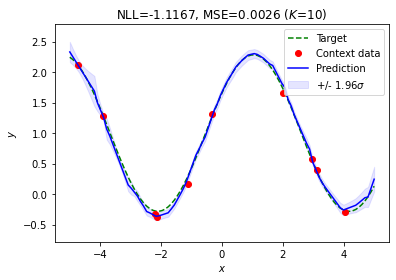

In [10]:
key, subkey = random.split(key)
plots.plot_notebooks(subkey, kernel, kernel_self, jac, output["trained_mean"], 10, dataset_sines_infinite)